In [12]:
import argparse
import sys
import numpy as np
from matplotlib import pyplot as plt
import numpy.linalg as la
from google.colab import files

In [13]:
# Compute the sample mean and standard deviations for each feature (column)
# across the training examples (rows) from the data matrix X.
def mean_std(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return mean, std

# Standardize the features of the examples in X by subtracting their mean and
# dividing by their standard deviation, as provided in the parameters.
def standardize(X, mean, std):
    S = (X - mean) / std
    return S

# Read data matrix X and labels t from text file.
def read_data(file_name):
    data = np.loadtxt(file_name)
    X = data[:, :-1]
    t = data[:, -1]
    return X, t.reshape(-1, 1)

# Implement gradient descent algorithm to compute w = [w0, w1].
def train(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros((X.shape[1], 1))  # Initialize weights
    N = len(t)  # Number of training examples

    for epoch in range(epochs):
        grad = compute_gradient(X, t, w)
        w -= eta * grad
        if epoch % 10 == 0:
            cost = compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)
    return w.flatten(), ep, costs

# Compute RMSE on dataset (X, t).
def compute_rmse(X, t, w):
    N = len(t)
    y_pred = np.dot(X, w)
    rmse = np.sqrt(np.sum((y_pred - t) ** 2) / N)
    return rmse

# Compute objective function (cost) on dataset (X, t).
def compute_cost(X, t, w):
    N = len(t)
    y_pred = np.dot(X, w)
    cost = np.sum((y_pred - t) ** 2) / (2 * N)
    return cost

# Compute gradient of the objective function (cost) on dataset (X, t).
def compute_gradient(X, t, w):
    grad = np.zeros(w.shape)
    N = len(t)
    y_pred = np.dot(X, w)

    for i in range(N):
        xi = X[i]
        ti = t[i]
        grad += np.outer(xi, (np.dot(xi, w) - ti))

    grad /= N
    return grad

# BONUS: Implement stochastic gradient descent algorithm to compute w = [w0, w1].
def train_SGD(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros((X.shape[1], 1))
    N = len(t)

    for epoch in range(epochs):
        indices = np.arange(N)
        np.random.shuffle(indices)
        X_shuffled = X[indices]
        t_shuffled = t[indices]

        for i in range(N):
            xi = X_shuffled[i]
            ti = t_shuffled[i]
            grad = compute_gradient(xi.reshape(-1, 1), ti, w)
            w -= eta * grad

        if epoch % 10 == 0:
            cost = compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)
    return w.flatten(), ep, costs

Params GD:  [254449.99982048  93308.92004027]
Training RMSE: 1037299.52.
Training cost: 537995146477.06.
Test RMSE: 783496.03.
Test cost: 306933016637.64.


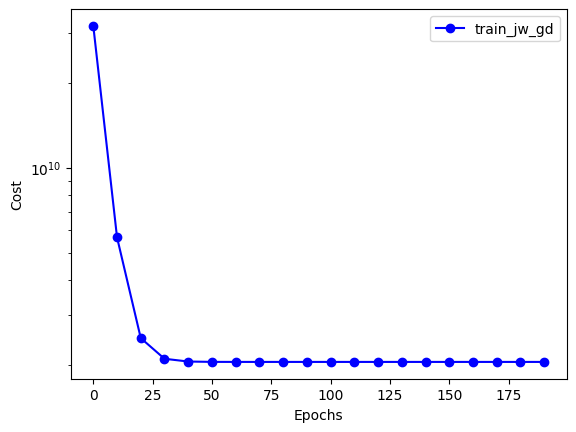

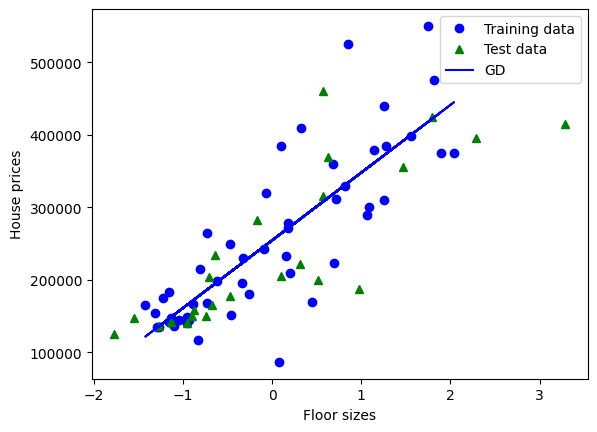

In [16]:
##======================= Main program =======================##
parser = argparse.ArgumentParser('Simple Regression Exercise.')
parser.add_argument('-i', '--input_data_dir',
                    type=str,
                    default='/content/drive/MyDrive/ML/linear regression /data/simple',
                    help='Directory for the simple houses dataset.')
FLAGS, unparsed = parser.parse_known_args()

# Read the training and test data.
Xtrain, ttrain = read_data(FLAGS.input_data_dir + "/train.txt")
Xtest, ttest = read_data(FLAGS.input_data_dir + "/test.txt")

# Compute mean and standard deviation for standardization.
mean, std = mean_std(Xtrain)

# Standardize the training and test data.
Xtrain_std = standardize(Xtrain, mean, std)
Xtest_std = standardize(Xtest, mean, std)

# Add bias feature to the standardized data.
Xtrain_std_bias = np.column_stack((np.ones(len(Xtrain_std)), Xtrain_std))
Xtest_std_bias = np.column_stack((np.ones(len(Xtest_std)), Xtest_std))

# Hyperparameters
eta = 0.1
epochs = 200

# Train the model using gradient descent.
w_gd, ep_gd, costs_gd = train(Xtrain_std_bias, ttrain, eta, epochs)

# Train the model using stochastic gradient descent (Bonus).
# w_sgd, ep_sgd, costs_sgd = train_SGD(Xtrain_std_bias, ttrain, eta, epochs)

# Print model parameters.
print('Params GD: ', w_gd)
# print('Params SGD: ', w_sgd)

# Print cost and RMSE on training data.
print('Training RMSE: %0.2f.' % compute_rmse(Xtrain_std_bias, ttrain, w_gd))
print('Training cost: %0.2f.' % compute_cost(Xtrain_std_bias, ttrain, w_gd))

# Print cost and RMSE on test data.
print('Test RMSE: %0.2f.' % compute_rmse(Xtest_std_bias, ttest, w_gd))
print('Test cost: %0.2f.' % compute_cost(Xtest_std_bias, ttest, w_gd))

# Plotting epochs vs. cost for gradient descent methods
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.yscale('log')
plt.plot(ep_gd, costs_gd, 'bo-', label='train_jw_gd')
# plt.plot(ep_sgd, costs_sgd, 'ro-', label='train_j_w_sgd')
plt.legend()
plt.savefig('gd_cost_simple.png')
plt.show()

# Plotting linear approximation for each training method
plt.xlabel('Floor sizes')
plt.ylabel('House prices')
plt.plot(Xtrain_std[:, 0], ttrain, 'bo', label='Training data')
plt.plot(Xtest_std[:, 0], ttest, 'g^', label='Test data')
plt.plot(Xtrain_std[:, 0], np.dot(Xtrain_std_bias, w_gd), 'b', label='GD')
# plt.plot(Xtrain_std[:, 1], np.dot(Xtrain_std_bias, w_sgd), 'g', label='SGD')
plt.legend()
plt.savefig('train-test-line.png')
plt.show()
